# Tweet Sentiment analysis NLP(mini proj 4)



**Problem Statement**

The task is to build a model that will determine the tone (neutral, positive, negative, Can’t
tell) of the text. To do this, you will need to train the model on the training data. The resulting
model will have to determine the class (neutral, positive, negative, Can’t tell) of test texts
(test data that were not used to build the model) with maximum accuracy.

Data Dictionary

ID: tweetID

**Tweet: Tweet by user**

Sentiment: tone of user


Negative = 0,
Neutral = 1,
Positive = 2,
Can’t tell = 3,


Perform Sentiment Analysis using knowledge of NLP.

## General lifecycle of NLP sentiment analysis project

**1) Data Collection**

**2) Data Preprocessing**

**3) E.D.A**

**4) Feature Extraction/Transform the preprocessed text**

**5) Model Training**

**6) Report**

### importing starting library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1) Data Collection

In [2]:
df= pd.read_csv("proj_4.csv")
df.head(25)

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
5,966,#technews One lone dude awaits iPad 2 at Apple...,1
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2
9,883,I think I might go all weekend without seeing ...,2


### As we can see there are few "noise","encoding issue" ,"@","#" 
### We need to clean all

# 2) Data Preprocessing

#### Dropping useless column

In [6]:
df.drop(columns=["tweet_id"],axis=1,inplace= True)

In [7]:
df

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1
...,...,...
7269,@mention Google plze Tammi. I'm in middle of ...,1
7270,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,RT @mention Aha! Found proof of lactation room...,1
7272,We just launched our iPad app at #SXSW! Get al...,1


In [8]:
import pandas_profiling as pdp   # one of the paackage for EXPLORING DATA 

report=pdp.ProfileReport(df,title="report")
report

C:\Users\Shivam Ranshur\AppData\Local\Temp\ipykernel_2480\1531114227.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pdp   # one of the paackage for EXPLORING DATA


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### we can see duplicate rows ,need to remove them ASAP  > remove null values

In [10]:
# checking null values
df.isnull().sum()

tweet        1
sentiment    0
dtype: int64

In [11]:
df.dropna(how="any")

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1
...,...,...
7269,@mention Google plze Tammi. I'm in middle of ...,1
7270,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,RT @mention Aha! Found proof of lactation room...,1
7272,We just launched our iPad app at #SXSW! Get al...,1


### Dropping duplicates

In [127]:
df1=df.copy()
df1.drop_duplicates(keep="first", inplace=True)

In [128]:
df1.shape  #there was 13 duplicates rows

(7260, 2)

In [129]:
df1.describe()

,sentiment
count,7260.000000
mean,1.299311
std,0.607910
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


# importing all important library

In [15]:
# relatable lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from keras.layers import LSTM, GRU,SimpleRNN
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

from gensim.models import Word2Vec
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
import re
import gensim
import tensorflow as tf

### Lowering all string data

In [131]:
# lowering all data in TWEETS
df1['tweet']= df1['tweet'].str.lower()

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7260 entries, 0 to 7273
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      7259 non-null   object
 1   sentiment  7260 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 170.2+ KB


### Removing noise data
it may occur due to encoding we need to change default

In [18]:
# trying encoding to remove non readable symbols _¼ û ä___ü ___ _____ _µ
df1['tweet'] = df1['tweet'].str.encode('ascii', 'ignore').str.decode('ascii')

In [19]:
df1.head(25)

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,learning ab google doodles! all doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,this iphone #sxsw app would b pretty awesome i...,0
4,line outside the apple store in austin waiting...,1
5,#technews one lone dude awaits ipad 2 at apple...,1
6,"sxsw tips, prince, npr videos, toy shopping wi...",1
7,nu user rt @mention new #ubersocial for #iphon...,1
8,free #sxsw sampler on itunes {link} #freemusic,2
9,i think i might go all weekend without seeing ...,2


#### Removing links

In [20]:
# removing link  {link}
df1['tweet'] = df1['tweet'].str.replace('{link}', '')

C:\Users\Shivam Ranshur\AppData\Local\Temp\ipykernel_2480\4117870222.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['tweet'] = df1['tweet'].str.replace('{link}', '')


In [21]:
df1.head(25)

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,learning ab google doodles! all doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,this iphone #sxsw app would b pretty awesome i...,0
4,line outside the apple store in austin waiting...,1
5,#technews one lone dude awaits ipad 2 at apple...,1
6,"sxsw tips, prince, npr videos, toy shopping wi...",1
7,nu user rt @mention new #ubersocial for #iphon...,1
8,free #sxsw sampler on itunes #freemusic,2
9,i think i might go all weekend without seeing ...,2


In [22]:
#removeing time stamp data like "[codes valid: 4:00-7:59:59p 03/11/11]" 
df1['tweet'] = df1['tweet'].str.replace(r'\[.*?\]', '', regex=True)


In [23]:
df1.tail(25)

,tweet,sentiment
7249,z7: lead don't follow #infektd #sxsw #zlf,1
7250,"rt @mention apple sets up 5,000-square-foot te...",1
7251,"rt @mention #sxsw gear bag: ipad 2, iphone, mo...",1
7252,viagra for your communications @mention launch...,2
7253,interesting! rt @mention google to launch majo...,1
7254,google to launch major new social network call...,1
7255,"sweet, apple's opening a pop-up shop in the sc...",2
7256,"rt @mention the future is about networks, not ...",0
7257,"did you miss google's vp of search, marissa ma...",1
7258,@mention massive lines at #sxsw apple store......,2


In [24]:
# remove noise like @..... | {link} | #....... | special symbol

df1.tweet= df1.tweet.apply(lambda x:re.sub("@[^\s]+","",str(x)))

In [25]:
df1.head(25)

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,learning ab google doodles! all doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,this iphone #sxsw app would b pretty awesome i...,0
4,line outside the apple store in austin waiting...,1
5,#technews one lone dude awaits ipad 2 at apple...,1
6,"sxsw tips, prince, npr videos, toy shopping wi...",1
7,nu user rt new #ubersocial for #iphone now in...,1
8,free #sxsw sampler on itunes #freemusic,2
9,i think i might go all weekend without seeing ...,2


In [26]:
# remove #words

In [27]:
# removing extra spaces
df1['tweet'] = df1['tweet'].apply(lambda x: re.sub('\s+', ' ', x).strip())

In [28]:
df1.head(25)

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,learning ab google doodles! all doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,this iphone #sxsw app would b pretty awesome i...,0
4,line outside the apple store in austin waiting...,1
5,#technews one lone dude awaits ipad 2 at apple...,1
6,"sxsw tips, prince, npr videos, toy shopping wi...",1
7,nu user rt new #ubersocial for #iphone now in ...,1
8,free #sxsw sampler on itunes #freemusic,2
9,i think i might go all weekend without seeing ...,2


### Removing special symbol

In [29]:
#removing special symbols
df1.tweet = df1.tweet.apply(lambda x:" ".join(re.findall(r"\w+", x)))



In [30]:
df1.head(25)

,tweet,sentiment
0,sxswnui sxsw apple defining language of touch ...,1
1,learning ab google doodles all doodles should ...,1
2,one of the most in your face ex of stealing th...,2
3,this iphone sxsw app would b pretty awesome if...,0
4,line outside the apple store in austin waiting...,1
5,technews one lone dude awaits ipad 2 at apples...,1
6,sxsw tips prince npr videos toy shopping with ...,1
7,nu user rt new ubersocial for iphone now in th...,1
8,free sxsw sampler on itunes freemusic,2
9,i think i might go all weekend without seeing ...,2


In [31]:
df1['tweet'] = df1['tweet'].str.replace('_', '')

In [32]:
df1.head(25)

,tweet,sentiment
0,sxswnui sxsw apple defining language of touch ...,1
1,learning ab google doodles all doodles should ...,1
2,one of the most in your face ex of stealing th...,2
3,this iphone sxsw app would b pretty awesome if...,0
4,line outside the apple store in austin waiting...,1
5,technews one lone dude awaits ipad 2 at apples...,1
6,sxsw tips prince npr videos toy shopping with ...,1
7,nu user rt new ubersocial for iphone now in th...,1
8,free sxsw sampler on itunes freemusic,2
9,i think i might go all weekend without seeing ...,2


#### removing single letters
because they dont hold any importance in sentiment analysis

In [33]:
# removing single letters like a - z
df1['tweet'] = df1['tweet'].str.replace(r'\b[a-zA-Z]\b', '', regex=True)

In [34]:
df1.tail(25)  #[codes valid: 4:00-7:59:59p 03/11/11]   7245

,tweet,sentiment
7249,z7 lead don follow infektd sxsw zlf,1
7250,rt apple sets up 5 000 square foot temporary s...,1
7251,rt sxsw gear bag ipad 2 iphone mophie travelin...,1
7252,viagra for your communications launches androi...,2
7253,interesting rt google to launch major new soci...,1
7254,google to launch major new social network call...,1
7255,sweet apple opening pop up shop in the scarb...,2
7256,rt the future is about networks not just data ...,0
7257,did you miss google vp of search marissa maye...,1
7258,massive lines at sxsw apple store agree can w...,2


In [37]:
#stop words handling


stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [38]:
stopword_list = " ,".join(stopwords.words('english')) 
stopword_list

"i ,me ,my ,myself ,we ,our ,ours ,ourselves ,you ,you're ,you've ,you'll ,you'd ,your ,yours ,yourself ,yourselves ,he ,him ,his ,himself ,she ,she's ,her ,hers ,herself ,it ,it's ,its ,itself ,they ,them ,their ,theirs ,themselves ,what ,which ,who ,whom ,this ,that ,that'll ,these ,those ,am ,is ,are ,was ,were ,be ,been ,being ,have ,has ,had ,having ,do ,does ,did ,doing ,a ,an ,the ,and ,but ,if ,or ,because ,as ,until ,while ,of ,at ,by ,for ,with ,about ,against ,between ,into ,through ,during ,before ,after ,above ,below ,to ,from ,up ,down ,in ,out ,on ,off ,over ,under ,again ,further ,then ,once ,here ,there ,when ,where ,why ,how ,all ,any ,both ,each ,few ,more ,most ,other ,some ,such ,no ,nor ,not ,only ,own ,same ,so ,than ,too ,very ,s ,t ,can ,will ,just ,don ,don't ,should ,should've ,now ,d ,ll ,m ,o ,re ,ve ,y ,ain ,aren ,aren't ,couldn ,couldn't ,didn ,didn't ,doesn ,doesn't ,hadn ,hadn't ,hasn ,hasn't ,haven ,haven't ,isn ,isn't ,ma ,mightn ,mightn't ,mustn ,mus

### Handling stopwords

In [40]:
# Removing Stopwords

STOPWORDS = set(stopword_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df1['tweet'] = df1['tweet'].apply(lambda text: cleaning_stopwords(text))
df1['tweet'].head(25)

0     sxswnui sxsw apple defining language of touch ...
1     learning ab google doodles all doodles should ...
2     one of the most in your face ex of stealing th...
3     this iphone sxsw app would pretty awesome if i...
4     line outside the apple store in austin waiting...
5     technews one lone dude awaits ipad 2 at apples...
6     sxsw tips prince npr videos toy shopping with ...
7     nu user rt new ubersocial for iphone now in th...
8                 free sxsw sampler on itunes freemusic
9     think might go all weekend without seeing the ...
10    rt official sxsw app sxsw go bit ly hmiiga and...
11              it official buying an ipad sxsw elevate
12    they re giving away ipad 2 boxes and books at ...
13    rt we re officially at sxsw come by the grill ...
14    companies to watch from the sxsw trade show fl...
15    rt google marissa mayer future of location aug...
16    dl the calyp app to get into calyp casa at sxs...
17    well yeah music gt iphone nerds rt my god 

In [41]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = []
    for word in words:
        if word.lower() not in stop_words:
            filtered_words.append(word)
    return ' '.join(filtered_words)

df1['tweet'] = df1['tweet'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\Shivam
[nltk_data]     Ranshur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
df1.head(25)

,tweet,sentiment
0,sxswnui sxsw apple defining language touch dif...,1
1,learning ab google doodles doodles light funny...,1
2,one face ex stealing show yrs rt quot sxsw app...,2
3,iphone sxsw app would pretty awesome crash eve...,0
4,line outside apple store austin waiting new ip...,1
5,technews one lone dude awaits ipad 2 apples sx...,1
6,sxsw tips prince npr videos toy shopping zucke...,1
7,nu user rt new ubersocial iphone app store inc...,1
8,free sxsw sampler itunes freemusic,2
9,think might go weekend without seeing ipad cas...,2


## Lemmatization **to convert to its root form**

In [44]:
# converting words to its base or root form 
#lemmatization

In [45]:
lm= nltk.WordNetLemmatizer()
df_lemmatized = df1.copy()  # make a copy of the original dataframe

# Define a function to lemmatize a sentence
def lemmatize_sentence(sentence):
    return ' '.join([lm.lemmatize(word) for word in sentence.split()])

# Apply the lemmatize_sentence function to the 'tweet' column
df_lemmatized['tweet_lemmatized'] = df1['tweet'].apply(lemmatize_sentence)

In [46]:
df_lemmatized.head(25)

,tweet,sentiment,tweet_lemmatized
0,sxswnui sxsw apple defining language touch dif...,1,sxswnui sxsw apple defining language touch dif...
1,learning ab google doodles doodles light funny...,1,learning ab google doodle doodle light funny a...
2,one face ex stealing show yrs rt quot sxsw app...,2,one face ex stealing show yr rt quot sxsw appl...
3,iphone sxsw app would pretty awesome crash eve...,0,iphone sxsw app would pretty awesome crash eve...
4,line outside apple store austin waiting new ip...,1,line outside apple store austin waiting new ip...
5,technews one lone dude awaits ipad 2 apples sx...,1,technews one lone dude awaits ipad 2 apple sxs...
6,sxsw tips prince npr videos toy shopping zucke...,1,sxsw tip prince npr video toy shopping zuckerb...
7,nu user rt new ubersocial iphone app store inc...,1,nu user rt new ubersocial iphone app store inc...
8,free sxsw sampler itunes freemusic,2,free sxsw sampler itunes freemusic
9,think might go weekend without seeing ipad cas...,2,think might go weekend without seeing ipad cas...


In [47]:
df3= df_lemmatized.reindex(columns=["tweet_lemmatized","sentiment"])

In [48]:
df3.head(25)

,tweet_lemmatized,sentiment
0,sxswnui sxsw apple defining language touch dif...,1
1,learning ab google doodle doodle light funny a...,1
2,one face ex stealing show yr rt quot sxsw appl...,2
3,iphone sxsw app would pretty awesome crash eve...,0
4,line outside apple store austin waiting new ip...,1
5,technews one lone dude awaits ipad 2 apple sxs...,1
6,sxsw tip prince npr video toy shopping zuckerb...,1
7,nu user rt new ubersocial iphone app store inc...,1
8,free sxsw sampler itunes freemusic,2
9,think might go weekend without seeing ipad cas...,2


### Tokanization

In [49]:
#tokenization

df3['tweet_lemmatized'] = df_lemmatized['tweet_lemmatized'].apply(word_tokenize)

In [50]:
df3

,tweet_lemmatized,sentiment
0,"[sxswnui, sxsw, apple, defining, language, tou...",1
1,"[learning, ab, google, doodle, doodle, light, ...",1
2,"[one, face, ex, stealing, show, yr, rt, quot, ...",2
3,"[iphone, sxsw, app, would, pretty, awesome, cr...",0
4,"[line, outside, apple, store, austin, waiting,...",1
...,...,...
7269,"[google, plze, tammi, middle, sxsw, craziness,...",1
7270,"[rt, set, edchat, musedchat, sxsw, sxswi, newt...",1
7271,"[rt, aha, found, proof, lactation, room, excus...",1
7272,"[launched, ipad, app, sxsw, get, detail, first...",1


### tokanization     embedding

In [51]:
#tokanization     embedding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df3['tweet_lemmatized'])
sequences = tokenizer.texts_to_sequences(df3['tweet_lemmatized'])
word_index = tokenizer.word_index
max_len= 50
data = pad_sequences(sequences, maxlen=max_len)

#above code tokanized data(lematized tweet) print data to see

In [52]:
data.shape

(7260, 50)

In [53]:
data

array([[   0,    0,    0, ..., 4444, 1125, 2352],
       [   0,    0,    0, ..., 4447, 1035,    1],
       [   0,    0,    0, ..., 2987,  333,    6],
       ...,
       [   0,    0,    0, ...,   97,   59,    1],
       [   0,    0,    0, ...,   58, 1543,   25],
       [   0,    0,    0, ...,  866, 7951,    1]])

# 3) E.D.A

### Word_cloud

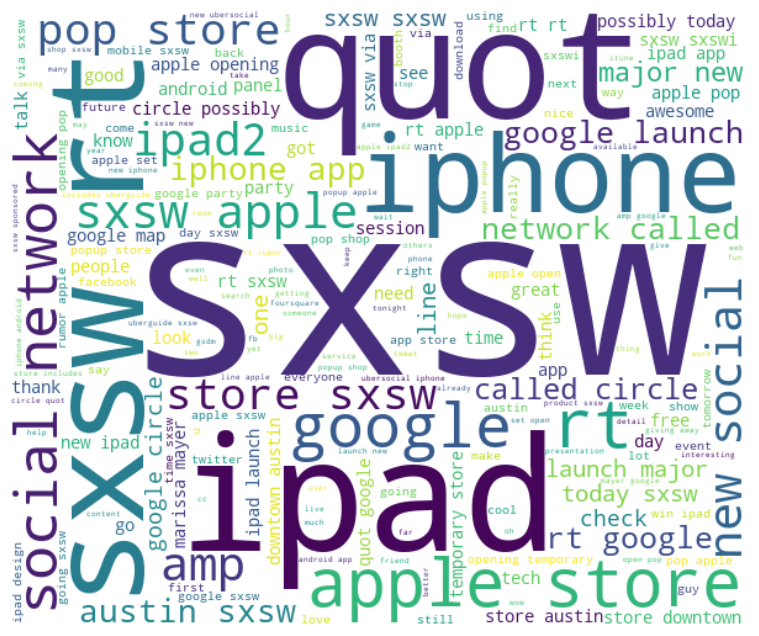

In [54]:
words_lm = " ".join([x for sublist in df3["tweet_lemmatized"] for x in sublist])
cloud_lm= WordCloud(width=600, height=500,background_color="white",random_state=23).generate(words_lm)

#plotting
plt.figure(figsize=(15,8))
plt.imshow(cloud_lm,interpolation="bilinear")
plt.axis("off")
plt.show()

### for negative words

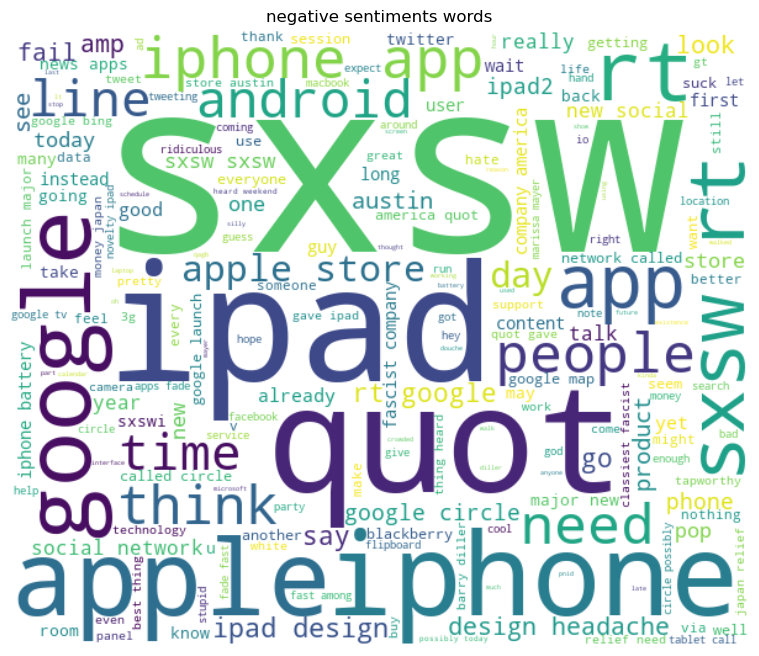

In [55]:
#negative
words_lm = " ".join([x for sublist in df3["tweet_lemmatized"][df3["sentiment"]==0] for x in sublist])
cloud_lm= WordCloud(width=600, height=500,background_color="white",random_state=23).generate(words_lm)

#plotting
plt.figure(figsize=(15,8))
plt.imshow(cloud_lm,interpolation="bilinear")
plt.axis("off")
plt.title("negative sentiments words")
plt.show()

### for neutral words

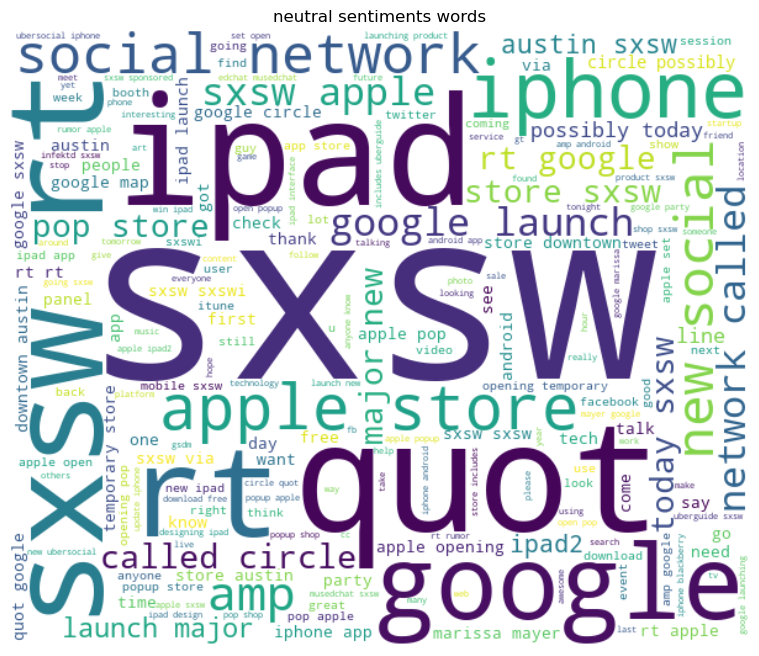

In [56]:
#neutral
words_lm = " ".join([x for sublist in df3["tweet_lemmatized"][df3["sentiment"]==1] for x in sublist])
cloud_lm= WordCloud(width=600, height=500,background_color="white",random_state=23).generate(words_lm)

#plotting
plt.figure(figsize=(12,8))
plt.imshow(cloud_lm,interpolation="bilinear")
plt.axis("off")
plt.title("neutral sentiments words")
plt.show()

### For positive words

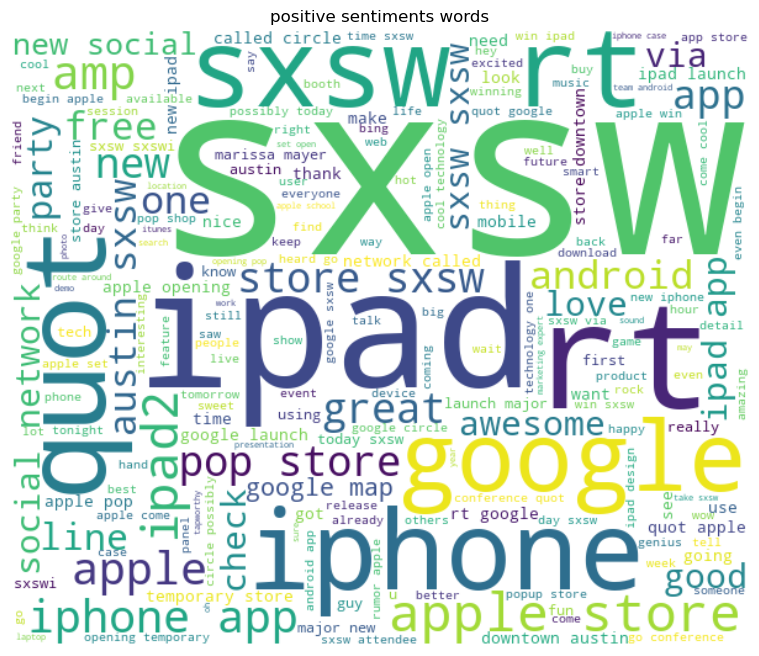

In [57]:
#positive
words_lm = " ".join([x for sublist in df3["tweet_lemmatized"][df3["sentiment"]==2] for x in sublist])
cloud_lm= WordCloud(width=600, height=500,background_color="white",random_state=23).generate(words_lm)

#plotting
plt.figure(figsize=(15,8))
plt.imshow(cloud_lm,interpolation="bilinear")
plt.axis("off")
plt.title("positive sentiments words")
plt.show()

### Can't Say words

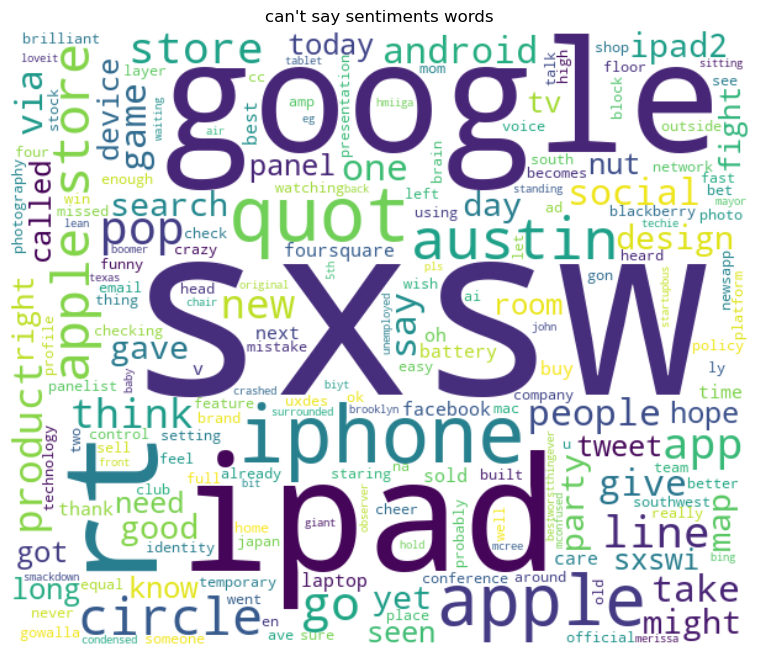

In [58]:
#cant say
words_lm = " ".join([x for sublist in df3["tweet_lemmatized"][df3["sentiment"]==3] for x in sublist])
cloud_lm= WordCloud(width=600, height=500,background_color="white",random_state=23).generate(words_lm)

#plotting
plt.figure(figsize=(15,8))
plt.imshow(cloud_lm,interpolation="bilinear")
plt.axis("off")
plt.title("can't say sentiments words")
plt.show()

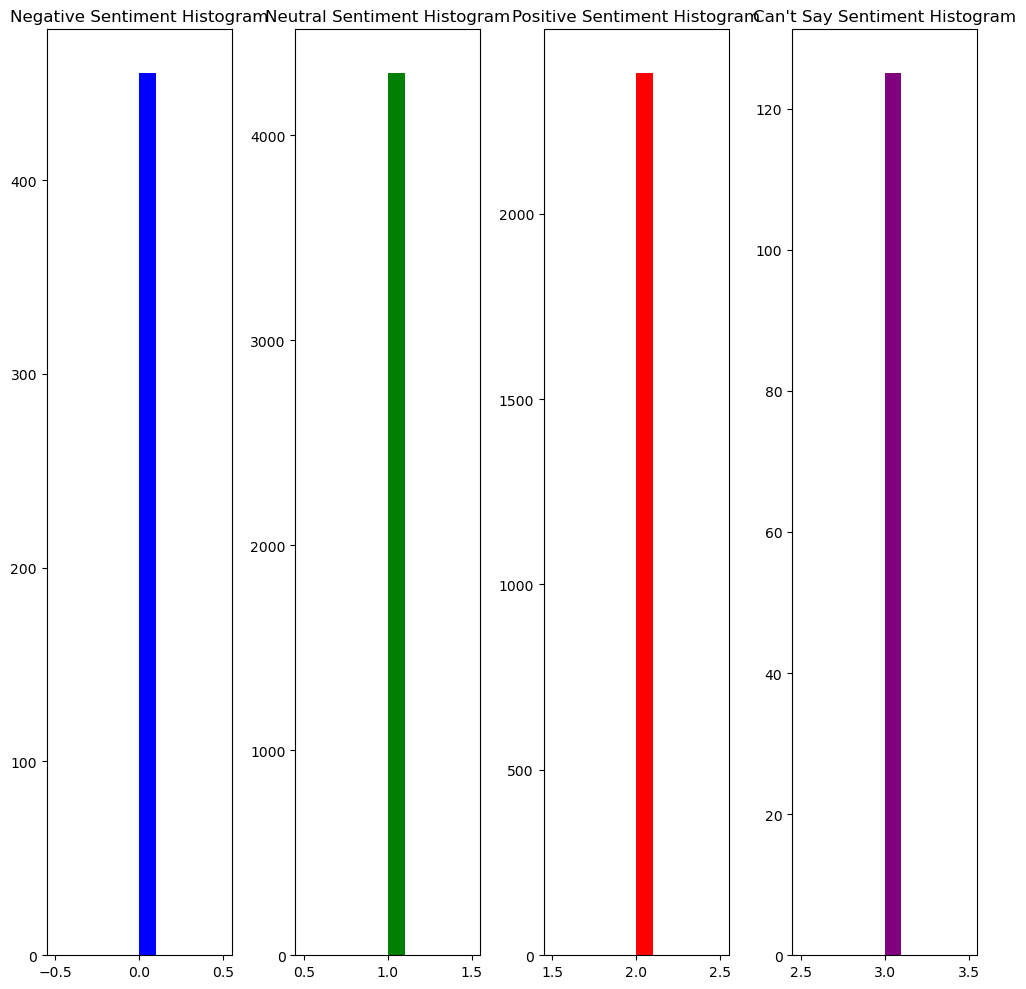

In [61]:

# Subset the data for each category
neg_sent = df1.loc[df1['sentiment'] == 0, 'sentiment']
neu_sent = df1.loc[df1['sentiment'] == 1, 'sentiment']
pos_sent = df1.loc[df1['sentiment'] == 2, 'sentiment']
cant_say_sent = df1.loc[df1['sentiment'] == 3, 'sentiment']

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))

# Plot histograms for each category
axs[0].hist(neg_sent, bins=10, color='blue')
axs[0].set_title('Negative Sentiment Histogram')

axs[1].hist(neu_sent, bins=10, color='green')
axs[1].set_title('Neutral Sentiment Histogram')

axs[2].hist(pos_sent, bins=10, color='red')
axs[2].set_title('Positive Sentiment Histogram')

axs[3].hist(cant_say_sent, bins=10, color='purple')
axs[3].set_title('Can\'t Say Sentiment Histogram')

plt.tight_layout()
plt.show()

**Report**
     We can see **Neutral** has the maximum count followed by **positive**
     
  **negative** and **Cant say** has less counts

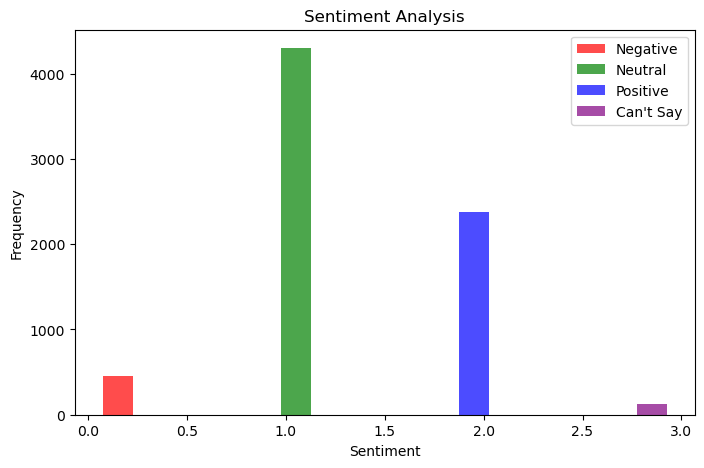

In [345]:
# Create subplots
fig, axs = plt.subplots(figsize=(8, 5))

# Plot histogram for all categories
axs.hist([neg_sent, neu_sent, pos_sent, cant_say_sent], bins=4, color=['red', 'green', 'blue', 'purple'], alpha=0.7)

# Add x and y labels and title
axs.set_xlabel('Sentiment')
axs.set_ylabel('Frequency')
axs.set_title('Sentiment Analysis')

# Add legend
axs.legend(['Negative', 'Neutral', 'Positive', 'Can\'t Say'])

# Show plot
plt.show()

#### we can see the count plot of all categories and imbalace in them

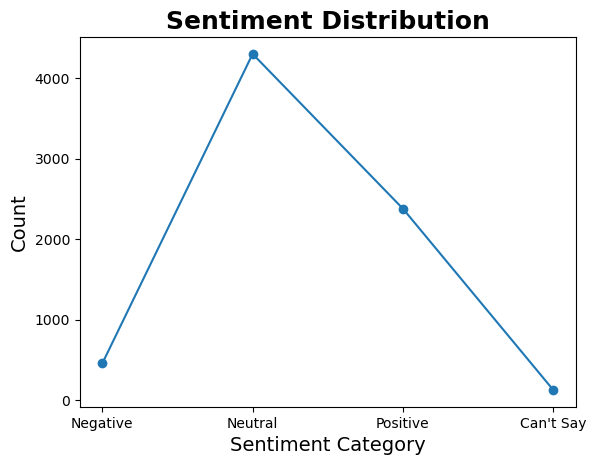

In [63]:
# Get the count of each category
neg_count = neg_sent.count()
neu_count = neu_sent.count()
pos_count = pos_sent.count()
cant_say_count = cant_say_sent.count()

# Create a list of counts
counts = [neg_count, neu_count, pos_count, cant_say_count]

# Create a list of categories
categories = ['Negative', 'Neutral', 'Positive', 'Can\'t Say']

# Plot the line graph
plt.plot(categories, counts, marker='o')
plt.title('Sentiment Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# 4) Feature Extraction/Transform the preprocessed text

### data splitting
testing

In [66]:
X= data
y= df3["sentiment"]

In [67]:
#split data into train and test data

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=42)

In [68]:
X_train.shape

(5445, 50)

In [69]:
sentences= [sentence for sentence in df3['tweet_lemmatized']]

In [70]:
len(sentences)

7260

### starting with word2vec model 

In [71]:
# Train word2vec model on tokenized sentences
embedding_size = 100
window_size = 5
min_word_count = 2
sg = 1  
word2vec_model = Word2Vec(sentences, vector_size=embedding_size, window=window_size,min_count= 2)

#####  embedding matrix for neural_Network

In [72]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_size))
for word, i in word_index.items():
    if word in word2vec_model.wv.index_to_key:
        embedding_matrix[i] = word2vec_model.wv[word]

In [73]:
# find the most similar word to input word

word2vec_model.wv.most_similar("ipad")

[('outside', 0.9977272748947144),
 ('sell', 0.9974919557571411),
 ('block', 0.997083306312561),
 ('action', 0.9963464140892029),
 ('queue', 0.996141254901886),
 ('move', 0.9961188435554504),
 ('retail', 0.9959355592727661),
 ('employee', 0.9957122802734375),
 ('selling', 0.9954142570495605),
 ('still', 0.9952924251556396)]

# 5) Model Building

**I have build few models using different technique for research, model numbers are mentioned**

# SimpleRnn model building (1st model)

In [74]:
max_len = 50
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights=[embedding_matrix], input_length=max_len))
model.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=64,kernel_initializer='uniform',activation="relu",input_dim=1))

model.add(Dense(1,kernel_initializer='uniform',activation='softmax'))
# if we use 1 above it works fine

In [75]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           795200    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               20100     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 821,829
Trainable params: 821,829
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X_train, y_train, epochs=50, batch_size=40)

Epoch 1/50


C:\Users\Shivam Ranshur\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


137/137 [==============================] - 8s 38ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 2/50
137/137 [==============================] - 5s 40ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 3/50
137/137 [==============================] - 5s 38ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 4/50
137/137 [==============================] - 5s 37ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 5/50
137/137 [==============================] - 7s 48ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 6/50
137/137 [==============================] - 6s 45ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 7/50
137/137 [==============================] - 5s 38ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 8/50
137/137 [==============================] - 6s 41ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 9/50
137/137 [==============================] - 5s 37ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 10/50
137/137 [==============================] - 6s 41ms/ste

In [77]:
score= model.evaluate(X_test,y_test,verbose=2)
score

57/57 - 1s - loss: 0.0000e+00 - accuracy: 0.5813 - 905ms/epoch - 16ms/step


[0.0, 0.581267237663269]

### Prediction with SimpleRNN 

In [78]:
#prediction
y_pred = model.predict(X_test)


57/57 [==============================] - 1s 5ms/step


In [79]:
from sklearn.metrics import accuracy_score

scor= accuracy_score(y_test,y_pred)
print(scor)

0.581267217630854


# Random forest with Word2vec (2nd)

In [80]:
#split data into train and test data
X1=df3["tweet_lemmatized"]
y1=df3["sentiment"]
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1, test_size=0.2,random_state=42)

In [81]:
w2v_model = gensim.models.Word2Vec(X_train1,vector_size=100,window=5, min_count=2)   

In [82]:
w2v_model.wv.index_to_key

['sxsw',
 'rt',
 'google',
 'ipad',
 'apple',
 'quot',
 'iphone',
 'store',
 '2',
 'new',
 'austin',
 'amp',
 'app',
 'circle',
 'launch',
 'social',
 'android',
 'pop',
 'today',
 'ipad2',
 'network',
 'get',
 'line',
 'free',
 'via',
 'party',
 'mobile',
 'called',
 'sxswi',
 'like',
 'time',
 'one',
 'major',
 'day',
 'check',
 'map',
 'temporary',
 'opening',
 'need',
 'open',
 'go',
 'come',
 'win',
 'going',
 'people',
 'mayer',
 'see',
 'great',
 'apps',
 'possibly',
 'downtown',
 'popup',
 'know',
 'marissa',
 'make',
 'want',
 'got',
 'year',
 '3',
 'say',
 'guy',
 'set',
 'good',
 'search',
 'cool',
 'think',
 'user',
 'news',
 'first',
 'love',
 'product',
 'u',
 'location',
 'talk',
 'rumor',
 'design',
 'music',
 'tech',
 'game',
 'next',
 'show',
 'panel',
 '4',
 'best',
 'use',
 'shop',
 'look',
 'around',
 '1',
 'thing',
 'big',
 'would',
 'phone',
 'right',
 'last',
 'thanks',
 'gt',
 'session',
 'awesome',
 'anyone',
 'take',
 'hey',
 'photo',
 'week',
 'really',
 'ca

In [83]:
# find the most similar word to input word

w2v_model.wv.most_similar("ipad")

[('still', 0.9982204437255859),
 ('ipads', 0.9980120658874512),
 ('waiting', 0.99796062707901),
 ('pic', 0.9978293180465698),
 ('sale', 0.9977261424064636),
 ('tomorrow', 0.9975351691246033),
 ('technews', 0.9975183010101318),
 ('head', 0.9974947571754456),
 ('already', 0.9974551200866699),
 ('block', 0.9974039793014526)]

In [84]:
words= set(w2v_model.wv.index_to_key)
words

{'unbearable',
 'mcommerce',
 'knowing',
 'device',
 'bitbop',
 'powerful',
 'marketer',
 'crashing',
 '504',
 'rude',
 'achieve',
 'chair',
 'spotted',
 'learned',
 'charm',
 'drumbeat',
 'netbook',
 'task',
 'moment',
 'alcohol',
 'att',
 'sick',
 'amazingly',
 'anyone',
 'understand',
 'boi',
 'cho',
 'frostwire',
 'bring',
 'umbrella',
 'ambassador',
 'liquid',
 'quadroid',
 'protecting',
 'debuting',
 'retweet',
 'paradigm',
 'urthots',
 'silly',
 'experimentation',
 'html',
 'past',
 '64gb',
 'agchat',
 'autocorrects',
 'spazmatics',
 'celeb',
 'delayed',
 'style',
 'ugh',
 'alert',
 'ahead',
 'dropped',
 'kawasaki',
 'tronlegacy',
 'gap',
 'layer',
 'covering',
 'downtown',
 'lanyrd',
 'mint',
 'ogilvynotes',
 'chromeos',
 'photo',
 'order',
 'mail',
 'response',
 'talented',
 '4',
 'virtual',
 'producer',
 'cmon',
 'stoked',
 'buy',
 'side',
 'aos',
 'braille',
 'panel',
 'vuitton',
 'juice',
 'ppl',
 'notice',
 '6th',
 'linkedin',
 'iphones',
 'ubiquity',
 'reporting',
 'inter

In [85]:
len(words)

3855

In [86]:
X_train_vec = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train1])
X_test_vec = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test1])

C:\Users\Shivam Ranshur\AppData\Local\Temp\ipykernel_2480\1479330896.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vec = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train1])
C:\Users\Shivam Ranshur\AppData\Local\Temp\ipykernel_2480\1479330896.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vec = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test1])


In [87]:
X_train_vec

array([array([[-6.50692061e-02,  6.57351315e-02, -1.21287927e-02,
                6.99880719e-03,  3.07418569e-03, -6.41925782e-02,
                1.66186281e-02,  1.07659109e-01, -2.38887034e-02,
               -3.65771055e-02, -6.36843452e-03, -4.75162379e-02,
                1.70659982e-02,  5.07589383e-03,  2.36254074e-02,
               -4.97295558e-02,  1.82601921e-02, -7.72744119e-02,
               -3.28006968e-03, -7.64316767e-02,  3.55408937e-02,
                3.93763594e-02,  5.56784272e-02, -4.01139818e-03,
                2.02987157e-03, -2.27164738e-02, -1.63335912e-02,
               -1.76803991e-02, -7.23035038e-02, -2.99725588e-02,
                6.67140931e-02,  5.01471851e-03,  2.93095950e-02,
               -5.48234060e-02, -1.17403073e-02,  4.78674583e-02,
                1.39554152e-02, -4.27276120e-02, -3.79276797e-02,
               -5.78808524e-02,  2.52574496e-02, -3.61526832e-02,
               -4.14509326e-02, -7.45153241e-03,  4.68281545e-02,
          

In [88]:
for i ,v in enumerate(X_train_vec):
    print(len(X_train1.iloc[i]),len(v))

10 10
17 17
16 14
14 13
16 16
8 7
8 8
12 12
13 13
6 5
9 7
13 12
12 9
5 5
19 19
12 11
10 10
10 10
15 14
15 15
7 6
15 14
14 14
13 13
10 10
7 5
18 18
11 11
14 14
11 10
11 9
13 11
6 6
13 11
5 5
8 8
11 11
16 16
12 12
14 14
9 7
11 9
7 7
9 9
16 16
15 15
10 9
12 12
11 11
7 7
8 8
10 10
10 10
12 10
7 7
12 12
6 6
7 6
12 11
11 11
11 11
15 13
12 12
12 12
14 14
12 12
16 16
6 5
10 10
18 18
13 13
18 17
10 10
10 10
10 10
10 9
11 10
6 6
6 6
9 9
11 11
16 15
12 12
16 15
6 6
11 11
6 6
12 11
10 9
13 13
15 15
12 12
10 10
14 14
17 14
13 12
9 7
11 9
13 12
11 11
15 11
6 6
10 10
15 14
8 8
16 15
12 12
13 13
11 11
15 15
11 10
8 8
13 11
14 14
16 16
9 8
6 6
11 11
13 12
6 6
12 12
15 15
6 6
16 16
14 14
15 15
6 3
10 10
13 11
14 14
14 11
18 18
4 4
15 13
11 11
16 16
10 10
11 11
13 12
13 12
13 13
11 11
12 12
11 8
10 9
10 6
7 6
13 13
11 10
18 18
10 10
14 14
13 12
6 6
10 10
14 14
7 7
11 11
14 14
6 6
8 8
11 11
9 9
5 5
14 11
17 15
16 15
15 15
11 11
8 8
11 11
13 11
11 11
8 8
9 8
12 12
10 10
19 19
6 5
10 10
8 8
12 12
12 12
9 9


In [89]:
# average the word vectors fro each sentence,
#(assign zero if model did not learn anything from training)
X_train_vec_avg=[]
for v in X_train_vec:
    if v.size:
        X_train_vec_avg.append(v.mean(axis= 0))
    else:
        X_train_vec_avg.append(np.zeros(100,dtype= float))
        
X_test_vec_avg=[]
for v1 in X_test_vec:
    if v1.size:
        X_test_vec_avg.append(v1.mean(axis= 0))
    else:
        X_test_vec_avg.append(np.zeros(100,dtype= float))     

In [90]:
for i ,v in enumerate(X_train_vec_avg):
    print(len(X_train1.iloc[i]),len(v))

10 100
17 100
16 100
14 100
16 100
8 100
8 100
12 100
13 100
6 100
9 100
13 100
12 100
5 100
19 100
12 100
10 100
10 100
15 100
15 100
7 100
15 100
14 100
13 100
10 100
7 100
18 100
11 100
14 100
11 100
11 100
13 100
6 100
13 100
5 100
8 100
11 100
16 100
12 100
14 100
9 100
11 100
7 100
9 100
16 100
15 100
10 100
12 100
11 100
7 100
8 100
10 100
10 100
12 100
7 100
12 100
6 100
7 100
12 100
11 100
11 100
15 100
12 100
12 100
14 100
12 100
16 100
6 100
10 100
18 100
13 100
18 100
10 100
10 100
10 100
10 100
11 100
6 100
6 100
9 100
11 100
16 100
12 100
16 100
6 100
11 100
6 100
12 100
10 100
13 100
15 100
12 100
10 100
14 100
17 100
13 100
9 100
11 100
13 100
11 100
15 100
6 100
10 100
15 100
8 100
16 100
12 100
13 100
11 100
15 100
11 100
8 100
13 100
14 100
16 100
9 100
6 100
11 100
13 100
6 100
12 100
15 100
6 100
16 100
14 100
15 100
6 100
10 100
13 100
14 100
14 100
18 100
4 100
15 100
11 100
16 100
10 100
11 100
13 100
13 100
13 100
11 100
12 100
11 100
10 100
10 100
7 100
13 100

### Fitting rf model

In [91]:
# fit RF model 
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf_model= rf.fit(X_train_vec_avg,y_train1.values)
y_pred= rf_model.predict(X_test_vec_avg)

In [92]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score

### Scores

In [93]:
pr= precision_score(y_test1,y_pred,average="weighted")
rc= recall_score(y_test1,y_pred,average="weighted")
acc= accuracy_score(y_test1,y_pred)


print("precision_score:",pr)
print("recall_score:",rc)
print("accuracy_score:",acc)

precision_score: 0.5310713951980992
recall_score: 0.5750688705234159
accuracy_score: 0.5750688705234159


C:\Users\anaconda new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
from sklearn.metrics import precision_score
precision = precision_score(y_test1, y_pred, zero_division='warn',average="weighted")
print(precision)




0.5310713951980992


C:\Users\anaconda new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyper tuning Above model

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [97]:
hp_rf = RandomForestClassifier()
grid_search = GridSearchCV(hp_rf, param_grid, cv=5, scoring='accuracy')

In [98]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train_vec_avg, y_train1.values)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [99]:
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [100]:
hp_rf = RandomForestClassifier(**best_params)
hp_rf.fit(X_train_vec_avg, y_train1)
hp_y_pred = hp_rf.predict(X_test_vec_avg)

In [101]:
# Compute the accuracy score
accuracy = accuracy_score(y_test1, hp_y_pred)
print(accuracy)

0.5764462809917356


In [102]:
pr= precision_score(y_test1,hp_y_pred,average="weighted")
rc= recall_score(y_test1,hp_y_pred,average="weighted")
acc= accuracy_score(y_test1,hp_y_pred)


print("precision_score:",pr)
print("recall_score:",rc)
print("accuracy_score:",acc)

precision_score: 0.5898529479662034
recall_score: 0.5764462809917356
accuracy_score: 0.5764462809917356


C:\Users\anaconda new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM model (3rd)

### building model NN


In [111]:
lstm_model= Sequential()   # creating
lstm_model.add(Embedding(len(word_index) + 1,100,weights=[embedding_matrix],input_length=max_len))
lstm_model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
lstm_model.add(Dense(units=10,kernel_initializer='uniform',activation="relu",input_dim=1))
lstm_model.add(Dense(units=10,kernel_initializer='uniform',activation="relu"))
lstm_model.add(Dense(units=1,kernel_initializer='uniform',activation="softmax"))

In [112]:
# Compile the model
lstm_model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           795200    
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 913,859
Trainable params: 913,859
Non-trainable params: 0
_________________________________________________________________


In [113]:
lstm_model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20


C:\Users\Shivam Ranshur\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


171/171 [==============================] - 18s 81ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 2/20
171/171 [==============================] - 14s 79ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 3/20
171/171 [==============================] - 14s 81ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 4/20
171/171 [==============================] - 14s 80ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 5/20
171/171 [==============================] - 14s 82ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 6/20
171/171 [==============================] - 13s 79ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 7/20
171/171 [==============================] - 14s 82ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 8/20
171/171 [==============================] - 14s 79ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 9/20
171/171 [==============================] - 14s 81ms/step - loss: 0.0000e+00 - accuracy: 0.5963
Epoch 10/20
171/171 [==============================] - 14

in above model we can observe **accuracy of 59%**

In [289]:
# Trying OverSampling
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer


# TF-idf and Random forest (4th model)

In [295]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from collections import Counter

#### Splitting data

In [296]:
#split data into train and test data
X2=df3["tweet_lemmatized"]
y2=df3["sentiment"]
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2, test_size=0.23)

In [297]:
X_train2.shape

(5590,)

## Tf-Idf

In [298]:
tfidf = TfidfVectorizer(ngram_range=(2,2))

## Over sampling with smote

In [299]:
from imblearn.over_sampling import SMOTE

##to make list of strings
X_train2 = [' '.join(words) for words in X_train2]
X_test2 = [' '.join(words) for words in X_test2]



X_train2_tfidf = tfidf.fit_transform(X_train2).toarray()
X_test2_tfidf = tfidf.transform(X_test2)

#Oversampling
smote = SMOTE(random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train2_tfidf, y_train2)



print("before oversampling : ",Counter(y_train2))
print("after oversampling : ",Counter(y_train_os))


before oversampling :  Counter({1: 3323, 2: 1821, 0: 349, 3: 97})
after oversampling :  Counter({0: 3323, 1: 3323, 2: 3323, 3: 3323})


In [300]:
X_train2_tfidf.shape

(5590, 28038)

### Random forest with Tf-Idf without over sampling (score)

In [301]:
rf2 = RandomForestClassifier(n_estimators=200,criterion='entropy')

rf2.fit(X_train2_tfidf,y_train2)
y_pred2 = rf2.predict(X_test2_tfidf)

accuracy_score(y_test2,y_pred2)

0.6437125748502994

## Random forest with Tf-Idf with over sampling (Score)

In [302]:
# with over sampled

rf2_os = RandomForestClassifier(n_estimators=200,criterion='entropy')

rf2_os.fit(X_train_os,y_train_os)
y_pred_os = rf2_os.predict(X_test2_tfidf)

accuracy_score(y_test2,y_pred_os)




0.6341317365269461

In [303]:
# without over-sampling

print(confusion_matrix(y_test2,y_pred2))
print(accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))

[[ 19  77   9   1]
 [ 11 873  92   3]
 [  4 370 183   0]
 [  1  24   3   0]]
0.6437125748502994
              precision    recall  f1-score   support

           0       0.54      0.18      0.27       106
           1       0.65      0.89      0.75       979
           2       0.64      0.33      0.43       557
           3       0.00      0.00      0.00        28

    accuracy                           0.64      1670
   macro avg       0.46      0.35      0.36      1670
weighted avg       0.63      0.64      0.60      1670



In [304]:
# with oversampled

print(confusion_matrix(y_test2,y_pred_os))
print(accuracy_score(y_test2,y_pred_os))
print(classification_report(y_test2,y_pred_os))

[[ 21  75   9   1]
 [ 11 862 103   3]
 [  2 379 175   1]
 [  0  24   3   1]]
0.6341317365269461
              precision    recall  f1-score   support

           0       0.62      0.20      0.30       106
           1       0.64      0.88      0.74       979
           2       0.60      0.31      0.41       557
           3       0.17      0.04      0.06        28

    accuracy                           0.63      1670
   macro avg       0.51      0.36      0.38      1670
weighted avg       0.62      0.63      0.59      1670



# TF-idf and MultinomialNB (5th model)

In [173]:
from sklearn.naive_bayes import MultinomialNB

In [346]:
# chosen MultinomialNB because we are doing multiclass classification

In [174]:
nb= MultinomialNB()
nb.fit(X_train2_tfidf,y_train2)

MultinomialNB()

In [175]:
#without over sampling

nb.fit(X_train2_tfidf,y_train2)
y_pred2 = nb.predict(X_test2_tfidf)

accuracy_score(y_test2,y_pred2)


0.6688622754491018

### TF-idf with MultinomialNB without over-sampling

In [177]:
nb.score(X_test2_tfidf,y_test2)

0.6688622754491018

### TF-idf with MultinomialNB with over-sampling

In [305]:
# with over sampled


nb.fit(X_train_os,y_train_os)
y_pred_os = nb.predict(X_test2_tfidf)

accuracy_score(y_test2,y_pred_os)



0.5640718562874252

**with over sampling and TF-idf with MultinomialNB , score decreases drastically**

In [176]:
# without over-sampling
print(confusion_matrix(y_test2,y_pred2))
print(accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))

[[  1  80   6   0]
 [  0 982  49   0]
 [  0 390 134   0]
 [  0  28   0   0]]
0.6688622754491018
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        87
           1       0.66      0.95      0.78      1031
           2       0.71      0.26      0.38       524
           3       0.00      0.00      0.00        28

    accuracy                           0.67      1670
   macro avg       0.59      0.30      0.30      1670
weighted avg       0.68      0.67      0.60      1670



C:\Users\anaconda new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anaconda new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anaconda new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Tf-Idf and XGboost   (6th model)

In [186]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [193]:
xgb = XGBClassifier(n_estimators=150)

In [194]:
xgb.fit(X_train2_tfidf,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## score

In [195]:

xgb.fit(X_train2_tfidf,y_train2)
y_pred2 = xgb.predict(X_test2_tfidf)

accuracy_score(y_test2,y_pred2)


0.6449101796407186

In [ ]:
# with over sampling system ccrashes for tfidf and xgboost

# using LSTM & Tf-Idf (7th model)

In [327]:
lstm_tfidf= Sequential()   # creating
lstm_tfidf.add(Embedding(len(word_index) + 1,100,weights=[embedding_matrix],input_length=max_len))
lstm_tfidf.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
lstm_tfidf.add(Dense(units=10,kernel_initializer='uniform',activation="relu",input_dim=1))
lstm_tfidf.add(Dense(units=10,kernel_initializer='uniform',activation="relu"))
lstm_tfidf.add(Dense(units=1,kernel_initializer='uniform',activation="softmax"))

In [328]:
# Compile the model
lstm_tfidf.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

lstm_tfidf.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 50, 100)           795200    
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 913,859
Trainable params: 913,859
Non-trainable params: 0
_________________________________________________________________


In [329]:
lstm_model.fit(X_train2_tfidf, y_train2, batch_size=32, epochs=20)

MemoryError: Unable to allocate 598. MiB for an array with shape (5590, 28038) and data type float32

#### with TF-Idf and LSTM memory issue occurs

#### Below are the models with word2vec but little different technique then above


# WORD2VEC

**Word2vec is used , because it stores semantic data and we need semantic data in this project**

In [ ]:
df4 = df3.copy()

In [ ]:
df4['tweet_lemmatized'] = df4['tweet_lemmatized'].apply(lambda x: ' '.join(x))

In [216]:
import gensim
from gensim.utils import simple_preprocess
from tqdm import tqdm

In [217]:
mod_w2v = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [218]:
mod_w2v.build_vocab(df4["tweet_lemmatized"])

#### trainingf word2vec model

In [219]:
mod_w2v.train(df4["tweet_lemmatized"], total_examples=mod_w2v.corpus_count, epochs=mod_w2v.epochs)

(447062, 2438460)

In [220]:
len(mod_w2v.wv.index_to_key)

37

In [214]:
df4

,tweet_lemmatized,sentiment
0,sxswnui sxsw apple defining language touch dif...,1
1,learning ab google doodle doodle light funny a...,1
2,one face ex stealing show yr rt quot sxsw appl...,2
3,iphone sxsw app would pretty awesome crash eve...,0
4,line outside apple store austin waiting new ip...,1
...,...,...
7269,google plze tammi middle sxsw craziness everyt...,1
7270,rt set edchat musedchat sxsw sxswi newtwitter,1
7271,rt aha found proof lactation room excuse quot ...,1
7272,launched ipad app sxsw get detail first editio...,1


In [223]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in mod_w2v.wv.index_to_key]
    return np.mean(mod_w2v.wv[doc], axis=0)

In [230]:
X2 = []
for doc in tqdm(df4['tweet_lemmatized'].values):
    doc_str = ' '.join(doc)
    X2.append(doc_vec(doc_str))

100%|████████████████████████████████████████████████████████████████████████████| 7260/7260 [00:01<00:00, 4064.49it/s]


In [231]:
X2 = np.array(X2)

In [232]:
X2[0]

array([-1.17645152e-01,  9.96358916e-02,  1.23782888e-01, -3.55266631e-02,
        1.00109041e-01, -1.70964137e-01, -1.42628327e-02,  2.00590312e-01,
       -2.97317514e-03, -1.54492348e-01, -6.05029166e-02, -1.08179130e-01,
       -1.92790508e-01, -1.06257414e-02,  2.77292985e-03,  7.75986612e-02,
        1.25036895e-01,  2.57617012e-02,  1.45981655e-01, -5.00948392e-02,
        4.15371619e-02, -6.40863255e-02,  2.30350226e-01,  7.65838772e-02,
       -1.61806598e-01,  2.94582874e-01, -2.38396987e-01,  7.86028877e-02,
        1.54376581e-01,  6.65838271e-02,  2.32771620e-01, -2.17093453e-02,
       -9.89173502e-02, -1.72601521e-01,  1.43070444e-01,  4.07442637e-02,
        1.35218546e-01,  3.98688531e-03, -1.18664674e-01,  1.74590215e-01,
        3.59594136e-01, -2.83908039e-01, -2.55292132e-02,  8.49536508e-02,
        1.99395474e-02,  2.34206319e-02, -3.03186849e-02, -2.02453732e-01,
        1.45507269e-02, -1.62604243e-01,  1.95710465e-01, -2.04326585e-01,
        1.05830163e-01,  

In [330]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,df4["sentiment"],test_size=0.25,random_state=42)

# Random forest with word2vec (8th model)

In [257]:
rf_w2v=RandomForestClassifier(n_estimators=250,criterion='gini')
rf_w2v.fit(X_train2,y_train2)

RandomForestClassifier(n_estimators=250)

In [258]:
y_pred_w2v = rf_w2v.predict(X_test2)

In [259]:
accuracy_score(y_test2,y_pred_w2v)

0.6066115702479339

In [348]:

print(confusion_matrix(y_test2,y_pred_w2v))
print(accuracy_score(y_test2,y_pred_w2v))
print(classification_report(y_test2,y_pred_w2v))

[[  5 101   9   0]
 [  3 944 107   1]
 [  0 465 151   0]
 [  2  22   4   1]]
0.6066115702479339
              precision    recall  f1-score   support

           0       0.50      0.04      0.08       115
           1       0.62      0.89      0.73      1055
           2       0.56      0.25      0.34       616
           3       0.50      0.03      0.06        29

    accuracy                           0.61      1815
   macro avg       0.54      0.30      0.30      1815
weighted avg       0.59      0.61      0.55      1815



# word2vec and logistic regression (9th MODEL)

In [264]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200, random_state=42)

In [265]:
lr.fit(X_train2,y_train2)

LogisticRegression(max_iter=200, random_state=42)

In [266]:
y_pred_lr = lr.predict(X_test2)
accuracy_score(y_test2,y_pred_lr)

0.5856749311294766

In [347]:

print(confusion_matrix(y_test2,y_pred_lr))
print(accuracy_score(y_test2,y_pred_lr))
print(classification_report(y_test2,y_pred_lr))

[[   0  113    2    0]
 [   0 1044   11    0]
 [   0  597   19    0]
 [   0   27    2    0]]
0.5856749311294766
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.59      0.99      0.74      1055
           2       0.56      0.03      0.06       616
           3       0.00      0.00      0.00        29

    accuracy                           0.59      1815
   macro avg       0.29      0.26      0.20      1815
weighted avg       0.53      0.59      0.45      1815



C:\Users\anaconda new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anaconda new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anaconda new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# word2vec and xgboost (10th model)

In [276]:
xgb_w2v = XGBClassifier()
xgb_w2v.fit(X_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [277]:
y_pred_xg = xgb_w2v.predict(X_test2)
accuracy_score(y_test2,y_pred_xg)

0.6005509641873278

In [349]:

print(confusion_matrix(y_test2,y_pred_xg))
print(accuracy_score(y_test2,y_pred_xg))
print(classification_report(y_test2,y_pred_xg))

[[  7  86  22   0]
 [  6 877 170   2]
 [  1 410 205   0]
 [  1  20   7   1]]
0.6005509641873278
              precision    recall  f1-score   support

           0       0.47      0.06      0.11       115
           1       0.63      0.83      0.72      1055
           2       0.51      0.33      0.40       616
           3       0.33      0.03      0.06        29

    accuracy                           0.60      1815
   macro avg       0.48      0.31      0.32      1815
weighted avg       0.57      0.60      0.56      1815



# 6) Report

After analysis of above models we can conclude that 

**4th Model**:- TF-idf and Random forest 

**5th Model** :- TF-idf and MultinomialNB 

**6th Model** :-  Tf-Idf and XGboost 

above models works good, and we can go with any one.But we should give first preference to **Ensemble** models .

Note:- In all the Above models 23% to 25% data is used for testing purpose

Word2vec used model could have done better if they have more data for learning purpose, as Word2vec Demand more data for learning